In [106]:
%matplotlib inline

import pandas as pd
import category_encoders as ce 
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import copy
from matplotlib import pyplot as plt

# Read data from Housing.csv

In [107]:
data = pd.read_csv('datasets/Housing.csv')
print(data.info())
print(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no

# Use OrdinalEncoder from catagory_encoders modul 
## Encoder is used for not numerical dtype columns

In [108]:
encoder = ce.OrdinalEncoder(cols=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'])
encoded_data = encoder.fit_transform(data)
encoded_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,1,1,1,1,2,1,1
1,12250000,8960,4,4,4,1,1,1,1,1,3,2,1
2,12250000,9960,3,2,2,1,1,2,1,2,2,1,2
3,12215000,7500,4,2,2,1,1,2,1,1,3,1,1
4,11410000,7420,4,1,2,1,2,2,1,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,1,2,1,2,2,2,3
541,1767150,2400,3,1,1,2,1,1,1,2,0,2,2
542,1750000,3620,2,1,1,1,1,1,1,2,0,2,3
543,1750000,2910,3,1,1,2,1,1,1,2,0,2,1


# Feature engineering:
Add some new features, which can help our model to fit the best. <br>
We can add: <br>
- <b>Area per bedroom</b> as approximate array for one bedroom
- <b>Bathroom per bedroom</b> as count of bathrooms for one bedroom - important for big family of 4 bedrooms - one bathroom is not enough at the morning
- <b>Parking per bedroom</b> count of parking places for each bedroom

In [109]:
encoded_data.insert(0, 'area_per_room', data['area']/data['bedrooms'])
encoded_data.insert(0, 'bathroom_per_bedroom', (data['bedrooms']/data['bathrooms']).replace([np.inf, -np.inf], 0))
encoded_data.insert(0, 'parking_per_bedroom', (data['bedrooms']/data['parking']).replace([np.inf, -np.inf], 0))
encoded_data

,parking_per_bedroom,bathroom_per_bedroom,area_per_room,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,2.000000,2.0,1855.000000,13300000,7420,4,2,3,1,1,1,1,1,2,1,1
1,1.333333,1.0,2240.000000,12250000,8960,4,4,4,1,1,1,1,1,3,2,1
2,1.500000,1.5,3320.000000,12250000,9960,3,2,2,1,1,2,1,2,2,1,2
3,1.333333,2.0,1875.000000,12215000,7500,4,2,2,1,1,2,1,1,3,1,1
4,2.000000,4.0,1855.000000,11410000,7420,4,1,2,1,2,2,1,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.000000,2.0,1500.000000,1820000,3000,2,1,1,1,1,2,1,2,2,2,3
541,0.000000,3.0,800.000000,1767150,2400,3,1,1,2,1,1,1,2,0,2,2
542,0.000000,2.0,1810.000000,1750000,3620,2,1,1,1,1,1,1,2,0,2,3
543,0.000000,3.0,970.000000,1750000,2910,3,1,1,2,1,1,1,2,0,2,1


## Drop unnecessary columns - for better explanation we use only 9 features - 3 new and 6 origin from dataset

In [110]:
encoded_data.drop(columns=['stories', 'mainroad', 'basement', 'hotwaterheating', 'prefarea', 'furnishingstatus'],axis=1,inplace=True)
encoded_data

,parking_per_bedroom,bathroom_per_bedroom,area_per_room,price,area,bedrooms,bathrooms,guestroom,airconditioning,parking
0,2.000000,2.0,1855.000000,13300000,7420,4,2,1,1,2
1,1.333333,1.0,2240.000000,12250000,8960,4,4,1,1,3
2,1.500000,1.5,3320.000000,12250000,9960,3,2,1,2,2
3,1.333333,2.0,1875.000000,12215000,7500,4,2,1,1,3
4,2.000000,4.0,1855.000000,11410000,7420,4,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...
540,1.000000,2.0,1500.000000,1820000,3000,2,1,1,2,2
541,0.000000,3.0,800.000000,1767150,2400,3,1,1,2,0
542,0.000000,2.0,1810.000000,1750000,3620,2,1,1,2,0
543,0.000000,3.0,970.000000,1750000,2910,3,1,1,2,0


# Apply MinMax scaler from sci-kit learn 'preprocessing' module 

In [111]:
scaler = preprocessing.MinMaxScaler()
numpy_data_normalized = scaler.fit_transform(encoded_data)
encoded_data_normalized = pd.DataFrame(numpy_data_normalized, columns=encoded_data.columns)
encoded_data_normalized

,parking_per_bedroom,bathroom_per_bedroom,area_per_room,price,area,bedrooms,bathrooms,guestroom,airconditioning,parking
0,0.333333,0.2,0.237016,1.000000,0.396564,0.6,0.333333,0.0,0.0,0.666667
1,0.222222,0.0,0.298923,0.909091,0.502405,0.6,1.000000,0.0,0.0,1.000000
2,0.250000,0.1,0.472584,0.909091,0.571134,0.4,0.333333,0.0,1.0,0.666667
3,0.222222,0.2,0.240232,0.906061,0.402062,0.6,0.333333,0.0,0.0,1.000000
4,0.333333,0.6,0.237016,0.836364,0.396564,0.6,0.000000,1.0,0.0,0.666667
...,...,...,...,...,...,...,...,...,...,...
540,0.166667,0.2,0.179932,0.006061,0.092784,0.2,0.000000,0.0,1.0,0.666667
541,0.000000,0.4,0.067374,0.001485,0.051546,0.4,0.000000,0.0,1.0,0.000000
542,0.000000,0.2,0.229780,0.000000,0.135395,0.2,0.000000,0.0,1.0,0.000000
543,0.000000,0.4,0.094710,0.000000,0.086598,0.4,0.000000,0.0,1.0,0.000000


# Plot our featured data in original scale

C:\Users\baksa\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


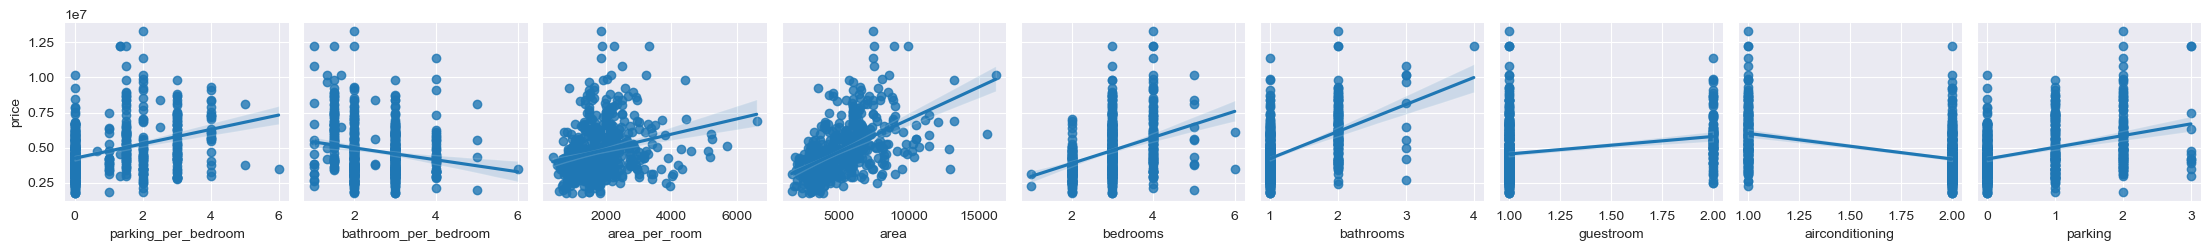

In [112]:
x_df = encoded_data.drop(['price'],axis=1) 

sns.pairplot(encoded_data, 
             x_vars=x_df.columns, 
             y_vars='price',
             diag_kind='hist',
             kind='reg')

# Plot our featured data MinMax Scaled

C:\Users\baksa\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


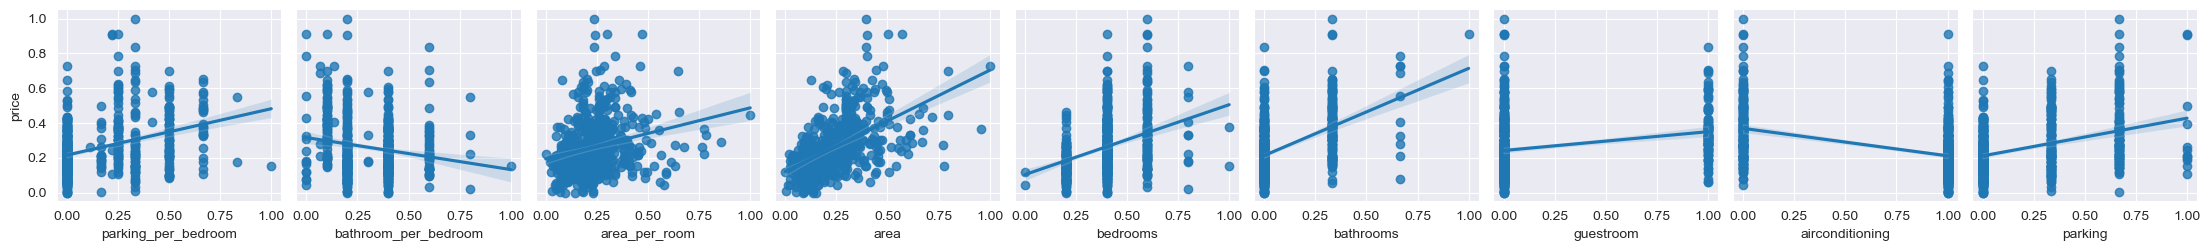

In [113]:
x_df_normalized = encoded_data_normalized.drop(['price'],axis=1) 

sns.pairplot(encoded_data_normalized, 
             x_vars=x_df_normalized.columns, 
             y_vars='price',
             diag_kind='hist',
             kind='reg')

# Split data to X (inputs) and Y (output)

In [114]:
x_train = encoded_data_normalized.drop(columns=['price'], axis=1).to_numpy()
y_train = encoded_data_normalized['price'].to_numpy().reshape(-1,1)

# Linear regression model - upon encoded and scaled featured data:

In [115]:
def compute_cost_vect(x, y, w, b):
    m = x.shape[0]
    
    f_x = np.dot(x, w) + b
    cost = (f_x - y)**2
    cost_sum = np.sum(cost)
    total_cost = (1 / (2.0 * m)) * cost_sum
    return total_cost

In [116]:
def compute_grad_vect(x, y, w, b):
    m = x.shape[0]
    
    f_wb = np.dot(x, w) + b
    error = f_wb - y
    dJ_dw = np.dot(x.T, error) * (1/m)  
    dJ_db = np.sum(error) * (1/m) 
    
    return (dJ_dw, dJ_db)

Lowest cost: 742688285.3093
Best model equation: f = -22667.4001.x1 + -46825.9996.x2 + 132147.3328


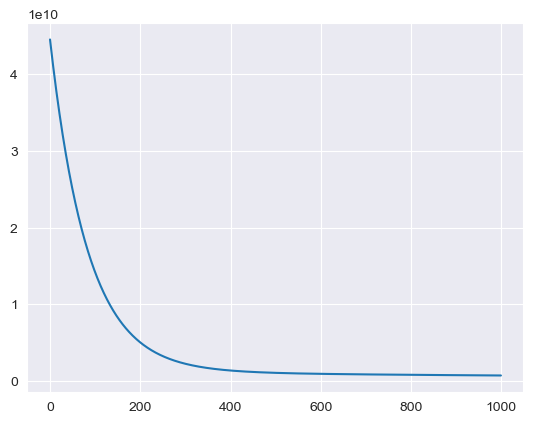

In [117]:
# training

# define model
w_init = np.array([2, 3, 2, 4, 1, 2, 3, 4, 1]).reshape(-1, 1)
b_init = 300000

# define count of iterations and alpha parameters
iterations = 1000
alpha = 3.0e-3

# avoid modifying global array 
w = copy.deepcopy(w_init)
b = copy.deepcopy(b_init)

# arrays to store cost values and model parameters (w and b) in all steps of training - to future plotting function
cost_history = []
model_history = []

# run training
for i in range(iterations):
    dJ_dw, dJ_db = compute_grad_vect(x_train, y_train, w, b)
    
    w = w - np.dot(dJ_dw, alpha)
    b = b - np.dot(dJ_db, alpha)
    
    # save all costs and model parameters in to arrays
    cost_history.append(compute_cost_vect(x_train, y_train, w, b))
    model_history.append([w, b])

print(f"Lowest cost: {cost_history[-1]:.4f}")
print("Best model equation: f = {:.4f}.x1 + {:.4f}.x2 + {:.4f}".format(model_history[-1][0][0][0], model_history[-1][0][1][0], model_history[-1][1]))
plt.plot(cost_history)